# Some regularizations on [Pima Indians Diabetes](https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv) dataset
By [Zahra Taheri](https://github.com/zahta), November 5, 2020

### Import libraries

In [1]:
#For some basic operations
import numpy as np
import pandas as pd
import torch

#For visualizations
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

# to make this notebook's output identical at every run
#np.random.seed(42)

import warnings
warnings.filterwarnings('ignore')

## Reading the dataset

In [2]:
data=pd.read_csv('diabetes.csv')
data.shape

(768, 9)

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Descriptive statistics and data visualizations

In [5]:
#Describe the dataset

data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
#Check the no. of unique items in each categorical column

data.select_dtypes('object').nunique()

Series([], dtype: float64)

In [7]:
# Percentage of missing data in each column

number_of_columns = data.shape[0]
percentage_of_missing_data = data.isnull().sum()/number_of_columns
print(percentage_of_missing_data)

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64


### Correlations

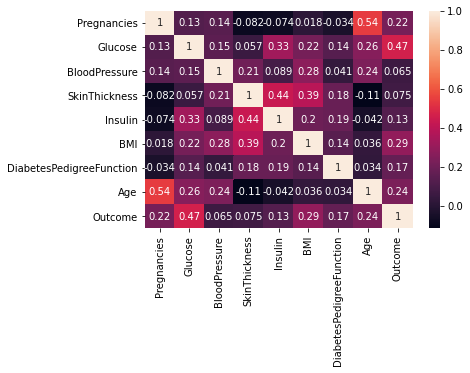

In [8]:
sns.heatmap(data.corr(), annot = True)

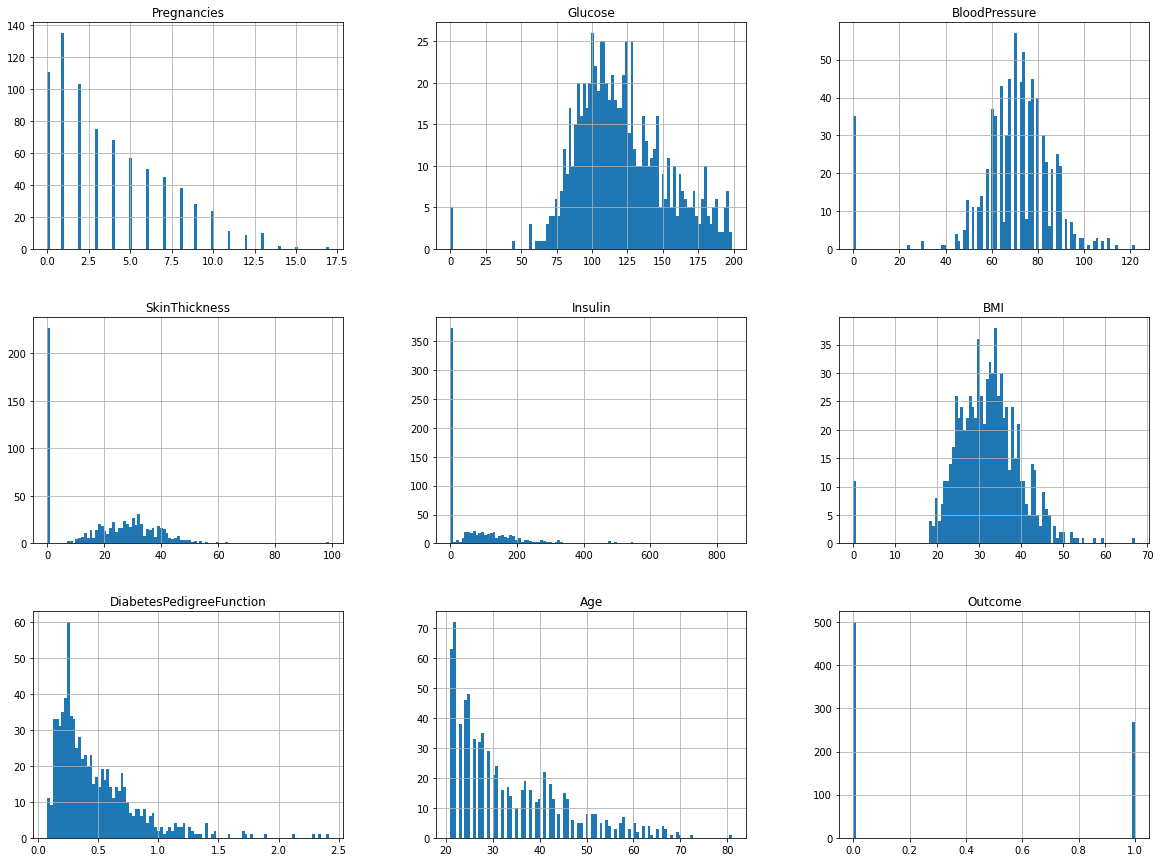

In [9]:
data.hist(bins=100, figsize=(20,15))

plt.show()

In [10]:
X=data.iloc[:,:8].values
y=data.iloc[:,8].values
print(data.shape)
print(X.shape)
print(y.shape)

(768, 9)
(768, 8)
(768,)


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
from sklearn.preprocessing import StandardScaler

std_scale = StandardScaler()

train_data = std_scale.fit_transform(X_train)
test_data = std_scale.transform(X_test)

train_labels = y_train.reshape(-1,1)
test_labels = y_test.reshape(-1,1)

In [13]:
#print(train_labels)

## Preparation of the dataset for PyTorch

In [14]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [15]:
#from torch.utils.data import TensorDataset, DataLoader

tensor_x = torch.tensor(train_data, dtype=torch.float).cuda() # transform to torch tensor
tensor_x2 = torch.tensor(test_data, dtype=torch.float).cuda() 

In [16]:
tensor_y = torch.tensor(train_labels, dtype=torch.float).cuda()
tensor_y2 = torch.tensor(test_labels, dtype=torch.float).cuda() 

In [17]:
# Normalizing the data

#print(tensor_x,tensor_x2)

#mean = torch.mean(tensor_x)
#std = torch.std(tensor_x)

#tensor_x = (tensor_x - mean) / std
#tensor_x2 = (tensor_x2 - mean) / std

## Building Feedforward Neural Networks with PyTorch

In [18]:
# import libraries
import torch
import torch.nn as nn
from torchsummary import summary

## L2 regularization

### Model A: 1 Hidden Layers Feedforward Neural Network

### Create model class

In [19]:
class FNN(nn.Module):
    def __init__(self, input_dim, hidden_dim1, output_dim):
        super(FNN, self).__init__()
        
        self.linear1 = nn.Linear(input_dim, hidden_dim1)
        self.relu1 = nn.ReLU()
        self.linear2 = nn.Linear(hidden_dim1, output_dim)
        self.sigmoid= nn.Sigmoid()

    def forward(self, x):
        out = self.linear1(x)
        out = self.relu1(out)
        out = self.linear2(out)
        out = self.sigmoid(out)
        return out

In [20]:
input_dim = tensor_x.shape[1]
output_dim = 1
hidden_dim1 = 500

In [21]:
model = FNN(input_dim, hidden_dim1, output_dim)

#######################
#  USE GPU FOR MODEL  #
#######################
if torch.cuda.is_available():
    model.cuda()


In [22]:
summary(model, (1,tensor_x.shape[1]))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 1, 500]           4,500
              ReLU-2               [-1, 1, 500]               0
            Linear-3                 [-1, 1, 1]             501
           Sigmoid-4                 [-1, 1, 1]               0
Total params: 5,001
Trainable params: 5,001
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.02
Estimated Total Size (MB): 0.03
----------------------------------------------------------------


In [23]:
criterion = nn.BCELoss()

learning_rate = 0.05
LAMBDA = 0.005
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=LAMBDA)

In [24]:
def accuracy(y_pred, y_test):
    y_pred_tag = torch.round(y_pred)

    correct_results_sum = (y_pred_tag == y_test).sum().float()
    acc = correct_results_sum/y_test.shape[0]
    acc = torch.round(acc * 100)
    
    return acc

In [25]:
# Train the model

num_epochs = 5000
epoch_loss = []
X = tensor_x
y = tensor_y
X_test = tensor_x2
y_test = tensor_y2

for epoch in range(num_epochs):
        # Forward pass to get output/logits
        outputs = model(X)
        
        # Calculate Loss
        loss = criterion(outputs, y)
        
        '''
        Save loss to draw loss curve
        '''
        epoch_loss.append(loss)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad() 
             
        # Getting gradients w.r.t. parameters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
    
        # Testing the model
        if epoch % 500 == 0:
            # Forward pass to get output/logits
            outputs = model(X_test)
            loss_t = criterion(outputs, y_test)
            
            # Print Loss
            print('Epoch: {}. Loss: {}. Accuracy: {}'.format(epoch, loss_t.data, accuracy(outputs, y_test)))
            

Epoch: 0. Loss: 0.6564121246337891. Accuracy: 66.0
Epoch: 500. Loss: 0.4310130774974823. Accuracy: 82.0
Epoch: 1000. Loss: 0.4371461272239685. Accuracy: 83.0
Epoch: 1500. Loss: 0.4422956705093384. Accuracy: 84.0
Epoch: 2000. Loss: 0.4455036222934723. Accuracy: 84.0
Epoch: 2500. Loss: 0.4476178288459778. Accuracy: 83.0
Epoch: 3000. Loss: 0.44900327920913696. Accuracy: 82.0
Epoch: 3500. Loss: 0.45015695691108704. Accuracy: 82.0
Epoch: 4000. Loss: 0.4508124887943268. Accuracy: 82.0
Epoch: 4500. Loss: 0.45139288902282715. Accuracy: 82.0


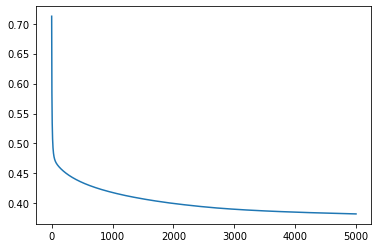

In [26]:
plt.plot(epoch_loss)

In [27]:
save_model = True
if save_model is True:
    torch.save(model.state_dict(), 'diabetes_pytorch_A_l2.pkl')# only save parameters

### Model B: 2 Hidden Layers Feedforward Neural Network

### Create model class

In [28]:
class FNN(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, output_dim):
        super(FNN, self).__init__()
        
        self.linear1 = nn.Linear(input_dim, hidden_dim1)
        self.relu1 = nn.ReLU()
        self.linear2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.relu2 = nn.ReLU()
        #self.linear3 = nn.Linear(hidden_dim2, hidden_dim3)
        #self.relu3 = nn.ReLU()
        self.linear4 = nn.Linear(hidden_dim2, output_dim)
        self.sigmoid= nn.Sigmoid()

    def forward(self, x):
        out = self.linear1(x)
        out = self.relu1(out)
        out = self.linear2(out)
        out = self.relu2(out)
        #out = self.linear3(out)
        #out = self.relu3(out)
        out = self.linear4(out)
        out = self.sigmoid(out)
        return out

In [29]:
input_dim = tensor_x.shape[1]
output_dim = 1
hidden_dim1 = 50
hidden_dim2 = 100

In [30]:
model = FNN(input_dim, hidden_dim1, hidden_dim2, output_dim)

#######################
#  USE GPU FOR MODEL  #
#######################
if torch.cuda.is_available():
    model.cuda()


In [31]:
summary(model, (1,tensor_x.shape[1]))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                [-1, 1, 50]             450
              ReLU-2                [-1, 1, 50]               0
            Linear-3               [-1, 1, 100]           5,100
              ReLU-4               [-1, 1, 100]               0
            Linear-5                 [-1, 1, 1]             101
           Sigmoid-6                 [-1, 1, 1]               0
Total params: 5,651
Trainable params: 5,651
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.02
Estimated Total Size (MB): 0.02
----------------------------------------------------------------


In [32]:
criterion = nn.BCELoss()

learning_rate = 0.01
LAMBDA = 0.009
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=LAMBDA)

In [33]:
# Train the model

num_epochs = 10000
epoch_loss = []
X = tensor_x
y = tensor_y
X_test = tensor_x2
y_test = tensor_y2

for epoch in range(num_epochs):
        # Forward pass to get output/logits
        outputs = model(X)
        
        # Calculate Loss
        loss = criterion(outputs, y)
        
        '''
        Save loss to draw loss curve
        '''
        epoch_loss.append(loss)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad() 
             
        # Getting gradients w.r.t. parameters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
    
        # Testing the model
        if epoch % 1000 == 0:
            # Forward pass to get output/logits
            outputs = model(X_test)
            loss_t = criterion(outputs, y_test)
            
            # Print Loss
            print('Epoch: {}. Loss: {}. Accuracy: {}'.format(epoch, loss_t.data, accuracy(outputs, y_test)))
            

Epoch: 0. Loss: 0.6790396571159363. Accuracy: 69.0
Epoch: 1000. Loss: 0.43703657388687134. Accuracy: 80.0
Epoch: 2000. Loss: 0.42542991042137146. Accuracy: 80.0
Epoch: 3000. Loss: 0.4258444607257843. Accuracy: 79.0
Epoch: 4000. Loss: 0.427883505821228. Accuracy: 79.0
Epoch: 5000. Loss: 0.4298558533191681. Accuracy: 79.0
Epoch: 6000. Loss: 0.43184348940849304. Accuracy: 79.0
Epoch: 7000. Loss: 0.4334612786769867. Accuracy: 79.0
Epoch: 8000. Loss: 0.43445712327957153. Accuracy: 79.0
Epoch: 9000. Loss: 0.4365594685077667. Accuracy: 79.0


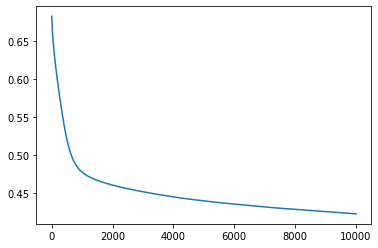

In [34]:
plt.plot(epoch_loss)

In [35]:
save_model = True
if save_model is True:
    torch.save(model.state_dict(), 'diabetes_pytorch_B_l2.pkl')# only save parameters

## L1 regularization

### Model A: 1 Hidden Layers Feedforward Neural Network

### Create model class

In [36]:
class FNN(nn.Module):
    def __init__(self, input_dim, hidden_dim1, output_dim):
        super(FNN, self).__init__()
        
        self.linear1 = nn.Linear(input_dim, hidden_dim1)
        self.relu1 = nn.ReLU()
        self.linear2 = nn.Linear(hidden_dim1, output_dim)
        self.sigmoid= nn.Sigmoid()

    def forward(self, x):
        out = self.linear1(x)
        out = self.relu1(out)
        out = self.linear2(out)
        out = self.sigmoid(out)
        return out

In [37]:
input_dim = tensor_x.shape[1]
output_dim = 1
hidden_dim1 = 500

In [38]:
model = FNN(input_dim, hidden_dim1, output_dim)

#######################
#  USE GPU FOR MODEL  #
#######################
if torch.cuda.is_available():
    model.cuda()


In [39]:
summary(model, (1,tensor_x.shape[1]))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 1, 500]           4,500
              ReLU-2               [-1, 1, 500]               0
            Linear-3                 [-1, 1, 1]             501
           Sigmoid-4                 [-1, 1, 1]               0
Total params: 5,001
Trainable params: 5,001
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.02
Estimated Total Size (MB): 0.03
----------------------------------------------------------------


In [40]:
criterion = nn.BCELoss()

learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [41]:
# Train the model

LAMBDA = 0.01
num_epochs = 10000
epoch_loss = []
X = tensor_x
y = tensor_y
X_test = tensor_x2
y_test = tensor_y2

for epoch in range(num_epochs):
        # Forward pass to get output/logits
        outputs = model(X)
        
        # Calculate Loss
        loss = criterion(outputs, y)
        '''
        L1 regularization
        '''
        l1_regularization = torch.tensor(0).long().to(device)
        for param in model.parameters():
            l1_regularization += torch.norm(param, 1).long().to(device)
            
        loss += LAMBDA * l1_regularization 
        '''
        Save loss to draw loss curve
        '''
        epoch_loss.append(loss)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad() 
             
        # Getting gradients w.r.t. parameters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
    
        # Testing the model
        if epoch % 500 == 0:
            # Forward pass to get output/logits
            outputs = model(X_test)
            loss_t = criterion(outputs, y_test)
            
            # Print Loss
            print('Epoch: {}. Loss: {}. Accuracy: {}'.format(epoch, loss_t.data, accuracy(outputs, y_test)))
            

Epoch: 0. Loss: 0.6833911538124084. Accuracy: 62.0
Epoch: 500. Loss: 0.49928319454193115. Accuracy: 76.0
Epoch: 1000. Loss: 0.46135762333869934. Accuracy: 81.0
Epoch: 1500. Loss: 0.44621777534484863. Accuracy: 81.0
Epoch: 2000. Loss: 0.4386325180530548. Accuracy: 81.0
Epoch: 2500. Loss: 0.4343768060207367. Accuracy: 81.0
Epoch: 3000. Loss: 0.43181461095809937. Accuracy: 81.0
Epoch: 3500. Loss: 0.43019551038742065. Accuracy: 81.0
Epoch: 4000. Loss: 0.42913737893104553. Accuracy: 81.0
Epoch: 4500. Loss: 0.42842888832092285. Accuracy: 81.0
Epoch: 5000. Loss: 0.427948534488678. Accuracy: 80.0
Epoch: 5500. Loss: 0.42762112617492676. Accuracy: 81.0
Epoch: 6000. Loss: 0.4273993670940399. Accuracy: 81.0
Epoch: 6500. Loss: 0.4272540211677551. Accuracy: 81.0
Epoch: 7000. Loss: 0.42716410756111145. Accuracy: 81.0
Epoch: 7500. Loss: 0.42711737751960754. Accuracy: 81.0
Epoch: 8000. Loss: 0.4271039068698883. Accuracy: 81.0
Epoch: 8500. Loss: 0.42711660265922546. Accuracy: 81.0
Epoch: 9000. Loss: 0.4

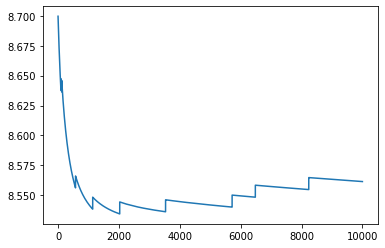

In [42]:
plt.plot(epoch_loss)

In [43]:
save_model = True
if save_model is True:
    torch.save(model.state_dict(), 'diabetes_pytorch_A_l1.pkl')# only save parameters

### Model B: 2 Hidden Layers Feedforward Neural Network

### Create model class

In [44]:
class FNN(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, output_dim):
        super(FNN, self).__init__()
        
        self.linear1 = nn.Linear(input_dim, hidden_dim1)
        self.relu1 = nn.ReLU()
        self.linear2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.relu2 = nn.ReLU()
        #self.linear3 = nn.Linear(hidden_dim2, hidden_dim3)
        #self.relu3 = nn.ReLU()
        self.linear4 = nn.Linear(hidden_dim2, output_dim)
        self.sigmoid= nn.Sigmoid()

    def forward(self, x):
        out = self.linear1(x)
        out = self.relu1(out)
        out = self.linear2(out)
        out = self.relu2(out)
        #out = self.linear3(out)
        #out = self.relu3(out)
        out = self.linear4(out)
        out = self.sigmoid(out)
        return out

In [45]:
input_dim = tensor_x.shape[1]
output_dim = 1
hidden_dim1 = 50
hidden_dim2 = 100

In [46]:
model = FNN(input_dim, hidden_dim1, hidden_dim2, output_dim)

#######################
#  USE GPU FOR MODEL  #
#######################
if torch.cuda.is_available():
    model.cuda()


In [47]:
summary(model, (1,tensor_x.shape[1]))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                [-1, 1, 50]             450
              ReLU-2                [-1, 1, 50]               0
            Linear-3               [-1, 1, 100]           5,100
              ReLU-4               [-1, 1, 100]               0
            Linear-5                 [-1, 1, 1]             101
           Sigmoid-6                 [-1, 1, 1]               0
Total params: 5,651
Trainable params: 5,651
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.02
Estimated Total Size (MB): 0.02
----------------------------------------------------------------


In [48]:
criterion = nn.BCELoss()

learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [49]:
# Train the model

LAMBDA = 0.001
num_epochs = 10000
epoch_loss = []
X = tensor_x
y = tensor_y
X_test = tensor_x2
y_test = tensor_y2

for epoch in range(num_epochs):
        # Forward pass to get output/logits
        outputs = model(X)
        
        # Calculate Loss
        loss = criterion(outputs, y)
        '''
        L1 regularization
        '''
        l1_regularization = torch.tensor(0).long().to(device)
        for param in model.parameters():
            l1_regularization += torch.norm(param, 1).long().to(device)
            
        loss += LAMBDA * l1_regularization 
        '''
        Save loss to draw loss curve
        '''
        epoch_loss.append(loss)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad() 
             
        # Getting gradients w.r.t. parameters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
    
        # Testing the model
        if epoch % 500 == 0:
            # Forward pass to get output/logits
            outputs = model(X_test)
            loss_t = criterion(outputs, y_test)
            
            # Print Loss
            print('Epoch: {}. Loss: {}. Accuracy: {}'.format(epoch, loss_t.data, accuracy(outputs, y_test)))
            

Epoch: 0. Loss: 0.7013036012649536. Accuracy: 37.0
Epoch: 500. Loss: 0.6650873422622681. Accuracy: 69.0
Epoch: 1000. Loss: 0.6400537490844727. Accuracy: 69.0
Epoch: 1500. Loss: 0.6196233034133911. Accuracy: 69.0
Epoch: 2000. Loss: 0.6011632084846497. Accuracy: 71.0
Epoch: 2500. Loss: 0.5835710167884827. Accuracy: 72.0
Epoch: 3000. Loss: 0.5664932131767273. Accuracy: 73.0
Epoch: 3500. Loss: 0.5498987436294556. Accuracy: 75.0
Epoch: 4000. Loss: 0.5340635180473328. Accuracy: 75.0
Epoch: 4500. Loss: 0.51917964220047. Accuracy: 77.0
Epoch: 5000. Loss: 0.5054879784584045. Accuracy: 77.0
Epoch: 5500. Loss: 0.4931240379810333. Accuracy: 79.0
Epoch: 6000. Loss: 0.48216375708580017. Accuracy: 79.0
Epoch: 6500. Loss: 0.47265109419822693. Accuracy: 78.0
Epoch: 7000. Loss: 0.4644501805305481. Accuracy: 78.0
Epoch: 7500. Loss: 0.45742231607437134. Accuracy: 79.0
Epoch: 8000. Loss: 0.4514124095439911. Accuracy: 79.0
Epoch: 8500. Loss: 0.4462955892086029. Accuracy: 79.0
Epoch: 9000. Loss: 0.4419658780

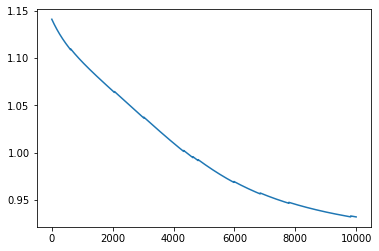

In [50]:
plt.plot(epoch_loss)

In [51]:
save_model = True
if save_model is True:
    torch.save(model.state_dict(), 'diabetes_pytorch_B_l1.pkl')# only save parameters